# A few useful things to know about machine learning - Pedro Domingos

<b>"Even though the true classifier is a set of rules, with up to 1,000 examples naive Bayes is more accurate than a rule learner. This happens despite naive Bayes’s false assumption that the frontier is linear!"</b>

Let's look at how a choice of model and therefore it's inductive bias can affect accuracy/generalization and variance, especially against two different classifiers. We generate a decision tree dataset (a set of rules) and try to tune hyperparameters to see if we can get naive Bayes (linear classifier in some cases) to do better than a rule learner (decision trees). 

In general just by feel: as data increases, decision tree wins out. But with less data, some cases where Naive Bayes wins out or is on par.

In the future may do something more systematic, comparing hyperparameters including {children in tree, chance of node becoming leaf, level_limit of the tree}.

In terms of bias, I think naive bayes makes harder assumptions (more bias, less complex model, less variance, less "powerful", larger "building blocks").  Looking for a more natural dataset that is a set of rules or comes from some decision tree to test on. Welcome to any commentary. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
class BinaryNode:
    def __init__(self, value):
        self.value = value
        self.isLeaf = None
        self.truth = None
        self.leftNode = None
        self.rightNode = None

In [3]:
class Node:
    def __init__(self, value):
        self.value = value
        self.isLeaf = None
        self.truth = None
        self.children = {}

In [4]:
# generate decision tree
# Generate data based on decision tree
# dataset 1-10 features BINARY 
    # generate 100, 1000, etc
# Compare naivebayes

In [5]:
def generateTree(limit, end_chance, node, children):
    isLeaf_flip = ((np.random.random() < end_chance) or limit == 1) and node.value != -1 #it's a head
    node.isLeaf = isLeaf_flip
    if node.isLeaf:
        node.truth = np.random.randint(children, size=1)[0]
        #print("leaf ", node.truth)
        return
    #child = np.random.randint(children, size=1)[0] + 1
    child = children
    for i in range(child):
        #print("i ", i)
        node.children[i] = Node(i)
        generateTree(limit-1, np.random.random(), node.children[i], children)
"""
children = 3
head = Node(-1)
level_limit = 10
generateTree(level_limit, 0.25, head, children)
"""

'\nchildren = 3\nhead = Node(-1)\nlevel_limit = 10\ngenerateTree(level_limit, 0.25, head, children)\n'

In [236]:
"""
# binary
def generateTree2(limit, end_chance, node):
    isLeaf_flip = ((np.random.random() < end_chance + np.random.random() - np.random.random()) or limit == 1) and node.value != -1 #it's a head
    node.isLeaf = isLeaf_flip
    if node.isLeaf:
        node.truth = np.random.randint(2, size=1)[0]
        print("leaf ", node.truth)
        return
    node.leftNode = Node(0)
    node.rightNode = Node(1)
    print("left")
    generateTree(limit-1, end_chance, node.leftNode)
    print("right")
    generateTree(limit-1, end_chance, node.rightNode)

head = Node(-1)
generateTree(5, 0.25, head)
"""

'\n# binary\ndef generateTree2(limit, end_chance, node):\n    isLeaf_flip = ((np.random.random() < end_chance + np.random.random() - np.random.random()) or limit == 1) and node.value != -1 #it\'s a head\n    node.isLeaf = isLeaf_flip\n    if node.isLeaf:\n        node.truth = np.random.randint(2, size=1)[0]\n        print("leaf ", node.truth)\n        return\n    node.leftNode = Node(0)\n    node.rightNode = Node(1)\n    print("left")\n    generateTree(limit-1, end_chance, node.leftNode)\n    print("right")\n    generateTree(limit-1, end_chance, node.rightNode)\n\nhead = Node(-1)\ngenerateTree(5, 0.25, head)\n'

In [ ]:
"""
def generateY(x, node):
    cur = node
    for i in x:
        if cur.isLeaf:
            #print("truth")
            return cur.truth
        if i == 0:
            #print("left")
            cur = cur.leftNode
        else:
            #print("right")
            cur = cur.rightNode
"""

In [6]:
def generateY(x, node):
    cur = node
    for i in x:
        if cur.isLeaf:
            #print("truth")
            return cur.truth
        if i in cur.children:
            #print("left")
            cur = cur.children[i]
        else: #maybe? now -1, 0, 1
            print("no")
            return -1
            
"""
data_x = np.random.randint(children, size=(100, level_limit))
#generateY([1, 1, 1, -1], head) #-1 denotes end 
data_y = [generateY(x, head) for x in data_x]
"""

'\ndata_x = np.random.randint(children, size=(100, level_limit))\n#generateY([1, 1, 1, -1], head) #-1 denotes end \ndata_y = [generateY(x, head) for x in data_x]\n'

In [48]:
# hyperparameters
iterations = 100
#data_size = 25
data_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 400]
# increase children? 
# get the average here and variance.

DT_acc_avg = []
DT_acc_std = []

NB_acc_avg = []
NB_acc_std = []

for data_size in data_sizes:
    DT_cm = []
    DT_acc = []

    NB_cm = []
    NB_acc = []
    print("data_size", data_size)
    for it in range(iterations):
        #print("Iteration", it)
        children = 2
        head = Node(-1)
        level_limit = 20
        generateTree(level_limit, 0.25, head, children)

        data_x = np.random.randint(children, size=(data_size, level_limit))
        #generateY([1, 1, 1, -1], head) #-1 denotes end 
        data_y = [generateY(x, head) for x in data_x]

        k = 2
        kf = KFold(n_splits=k)

        for train_index, test_index in kf.split(data_x):
            X_train, X_test = np.take(data_x, train_index, 0), np.take(data_x, test_index, 0)
            y_train, y_test = np.take(data_y, train_index, 0), np.take(data_y, test_index, 0)
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(X_train, y_train)
            y_pred_t = clf.predict(X_train)
            #print("DT")
            #print("Train acc: ", accuracy_score(y_pred_t, y_train))
            y_pred = clf.predict(X_test)
            DT_cm_i = confusion_matrix(y_pred, y_test) 
            #print(DT_cm_i)
            DT_acc_i = accuracy_score(y_pred, y_test)
            #print("Test acc: ", DT_acc_i)
            DT_cm.append(DT_cm_i)
            DT_acc.append(DT_acc_i)

            #print("GNB")
            gnb = GaussianNB()
            gnb.fit(X_train, y_train)
            y_pred_t = gnb.predict(X_train)
            #print("Train acc: ", accuracy_score(y_pred_t, y_train))
            y_pred = gnb.predict(X_test)
            NB_cm_i = confusion_matrix(y_pred, y_test)
            #print(NB_cm_i)
            NB_acc_i = accuracy_score(y_pred, y_test)
            #print("Test acc: ", NB_acc_i)
            NB_acc.append(NB_acc_i)
            NB_cm.append(NB_cm_i)
            
    DT_acc_avg_i = np.average(DT_acc)
    print("DT average: ", DT_acc_avg_i)
    DT_acc_std_i = np.std(DT_acc)
    print("DT std ", DT_acc_std_i)
    DT_acc_avg.append(DT_acc_avg_i)
    DT_acc_std.append(DT_acc_std_i)

    NB_acc_avg_i = np.average(NB_acc)
    print("NB average: ", NB_acc_avg_i)
    NB_acc_std_i = np.std(NB_acc)
    print("NB std ", NB_acc_std_i)
    NB_acc_avg.append(NB_acc_avg_i)
    NB_acc_std.append(NB_acc_std_i)

    

data_size 5
DT average:  0.6475
DT std  0.34608023315089487
NB average:  0.6808333333333333
NB std  0.3410675641765622
data_size 10
DT average:  0.716
DT std  0.27448861542876424
NB average:  0.726
NB std  0.25084656664981486
data_size 15
DT average:  0.7933035714285714
DT std  0.23888851295091182
NB average:  0.7455357142857143
NB std  0.22703691093866527
data_size 20
DT average:  0.7895
DT std  0.20479196761591992
NB average:  0.8035
NB std  0.18530447916874543
data_size 25
DT average:  0.8413461538461539
DT std  0.19053213442148226
NB average:  0.8016346153846154
NB std  0.19234208827014004
data_size 30
DT average:  0.8596666666666667
DT std  0.17793850373404604
NB average:  0.8513333333333333
NB std  0.16542336258488066
data_size 35
DT average:  0.8619771241830065
DT std  0.1602717058079832
NB average:  0.8428267973856208
NB std  0.16605700280124513
data_size 40
DT average:  0.8845000000000001
DT std  0.15283896754427517
NB average:  0.8905000000000001
NB std  0.13512864241159236
d

Text(0.5, 0, 'Data size')

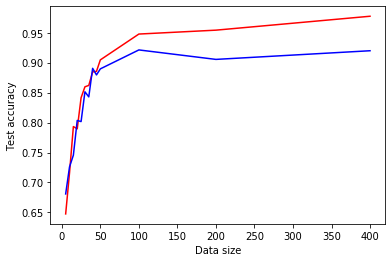

In [60]:
plt.plot(data_sizes, DT_acc_avg, color='red')
plt.plot(data_sizes, NB_acc_avg, color='blue')
plt.legend
#plt.errorbar(data_sizes, NB_acc_avg, NB_acc_std, color='blue', linestyle='None', marker='^', capsize=3)
#plt.errorbar(data_sizes, DT_acc_avg, DT_acc_std, color='red', linestyle='None', marker='^', capsize=3)
plt.ylabel("Test accuracy")
plt.xlabel("Data size")

Text(0.5, 0, 'Data size')

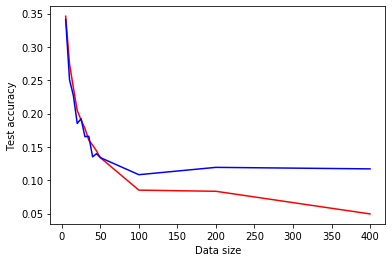

In [63]:
plt.plot(data_sizes, DT_acc_std, color='red')
plt.plot(data_sizes, NB_acc_std, color='blue')
#plt.errorbar(data_sizes, NB_acc_avg, NB_acc_std, color='blue', linestyle='None', marker='^', capsize=3)
#plt.errorbar(data_sizes, DT_acc_avg, DT_acc_std, color='red', linestyle='None', marker='^', capsize=3)
plt.ylabel("Test accuracy")
plt.xlabel("Data size")

Text(0.5, 0, 'Data size')

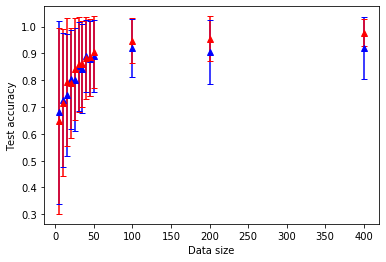

In [62]:
plt.errorbar(data_sizes, NB_acc_avg, NB_acc_std, color='blue', linestyle='None', marker='^', capsize=3)
plt.errorbar(data_sizes, DT_acc_avg, DT_acc_std, color='red', linestyle='None', marker='^', capsize=3)
plt.ylabel("Test accuracy")
plt.xlabel("Data size")

In [276]:

"""
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred_t = clf.predict(X_train, y_train)
y_pred = clf.predict(X_test, y_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
#tree.plot_tree(clf.fit(X_train, y_train))
"""

[[8 3 2]
 [1 3 4]
 [0 1 1]]
0.5217391304347826


In [277]:
"""
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
"""

[[9 5 3]
 [0 2 2]
 [0 0 2]]
0.5652173913043478


In [ ]:
# simulate this 10 - 100 times and get accuracy 

In [ ]:
# write some tests for both generateTree and generateData functions!
# Is this too easy of a problem? 
